# EDA on Haberman’s Cancer Survival Dataset

## (1) About Dataset:

Dataset Link: [https://www.kaggle.com/gilsousa/habermans-survival-data-set]

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient’s year of operation (year — 1900, numerical)
3. Number of positive auxillary nodes detected (numerical)
4. Survival status (class attribute): 
   1 = the patient survived 5 years or longer 
   2 = the patient died    within 5 years

## (2) Objective:

In a Habermen cancer survival dataset, there are four featues viz. age, year, nodes and status.Our main objective is to predict whether the patient will survive after 5 years or not based on these features.

##  (3) Importing libraries and loading the file:


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

haberman = pd.read_csv('haberman.csv')

## (4)Basic Information of the Data:

In [3]:
#Brief information of the dataset.
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [4]:
# Printing first 5 rows of the dataset.
print(haberman.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [5]:
print(haberman.shape)

(306, 4)


This CSV file contains 304 rows and 4 columns.

In [6]:
# Printing the name of columns.
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [7]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

There are 225 data points which are belonging to class 1 and 81 data points which are belonging to class 2.

## (5)Univaraite Analysis:

### (5.1) PDF

PDF is the smoothed form of the histogram.

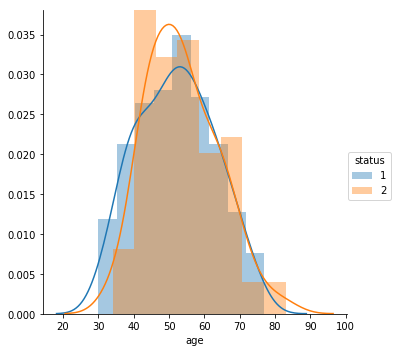

In [8]:
#PDF using age feature
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

### Observation:

1. Major overlaping is observed.
2. Although there is overlapping, we can say that people having age between 40-65 are less chances to    survive.
3. Hence, age alone feature is not useful to decide survival status of patient.

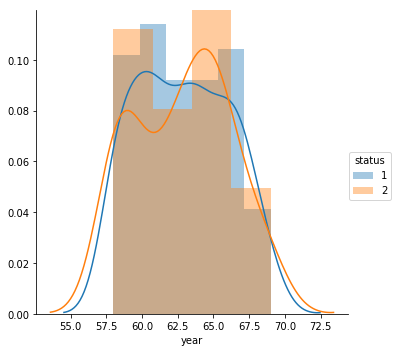

In [16]:
# PDF using year feature
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

### Observation:

1. Major overlapping is observed. Hence, year feature is not useful to describe survival status of  patients.

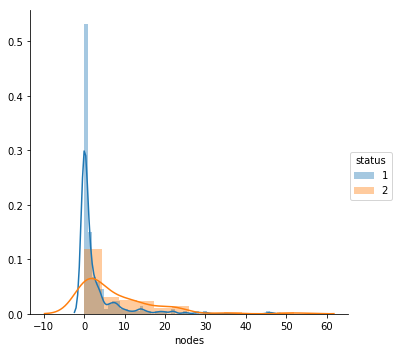

In [12]:
# PDF using nodes features.
sns.FacetGrid(haberman, hue = "status", size = 5)\
    .map(sns.distplot, "nodes")\
    .add_legend();
    
plt.show()

### Observation:

1. Patients having a node 0 or less than 1 are more likely to survive. Patients having node more than 25 are very few chances to survive.

### (5.2) CDF:

The Cumulative Distribution Function (CDF) is the probability that the variable takes a value less than or equal to x.

In [21]:
"""Creating a new dataframe status_yes which is corresponding to the survival status 1(i.e patients 
 survived more than 5 year) and status_no which is corresponding to the survival status 2(i.e. patients
survived less than 5 years)."""

status_yes = haberman.loc[haberman["status"] == 1]
status_no = haberman.loc[haberman["status"] == 2]

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
***********************************************************
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


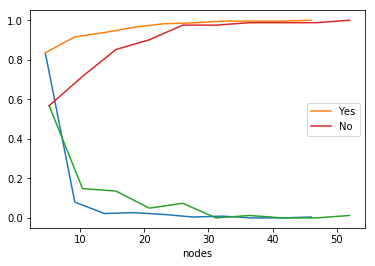

In [22]:
counts1, bin_edges1 = np.histogram(status_yes['nodes'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')
plt.xlabel('nodes')

print("***********************************************************")

counts2, bin_edges2 = np.histogram(status_no['nodes'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.xlabel('nodes')
plt.legend()
plt.show()

### Observation:

Around 83.56% patients survived who had nodes less than 4.6.

### (5.3) Box Plots:

Box plots uses percentile values of the data. The whiskers of the box is used to show range of the data.

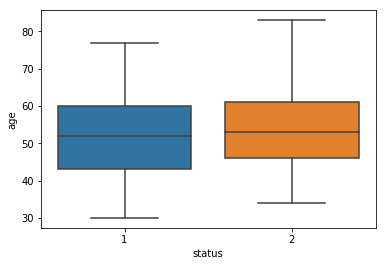

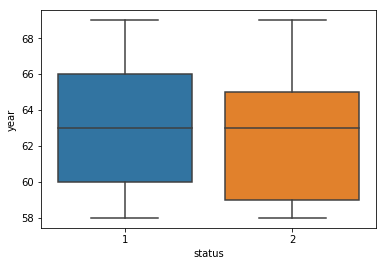

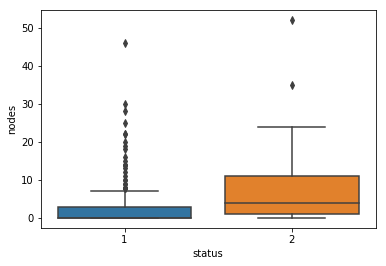

In [24]:
# Box plot for age feature.
sns.boxplot(x='status',y='age',data=haberman)
plt.show()

#Box plot for year feature.
sns.boxplot(x='status',y='year',data=haberman)
plt.show()

#Box plot for nodes feature.
sns.boxplot(x='status',y='nodes',data=haberman)
plt.show()

### (5.4) Violin Plot:

A violin plot is a combination of box plot and PDF.

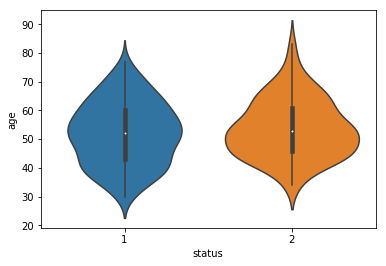

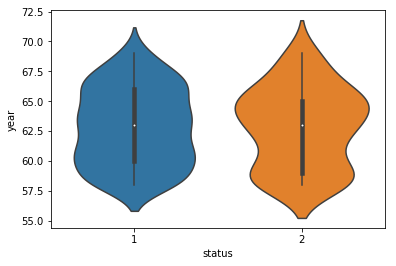

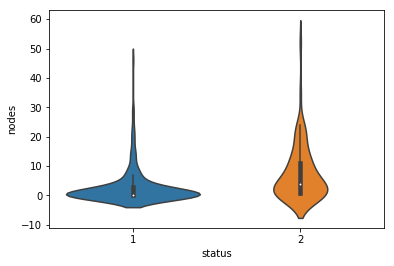

In [25]:
# Violin plot for age feature
sns.violinplot(x = "status", y = "age", data = haberman, height = 10)
plt.show()

#Violin plot for year feature
sns.violinplot(x = "status", y = "year" , data = haberman, height = 10)
plt.show()

# Violin plot for nodes feature
sns.violinplot(x = "status", y = "nodes", data = haberman, height = 10)
plt.show()

### Observation:

1. The Box plot and Violin plot for the age and year feature is similar and consists overlapping of a datapoins. Hence, we can not set thresold to classify the patient's survival status. 

## (6) Bi-Variate Analysis:

### (6.1) Scatter plots:

Scatter plot is the 2-D data visualization technique which uses dots to represent values of two different features-one plotted along with x-axis and one plotted with y-axis.

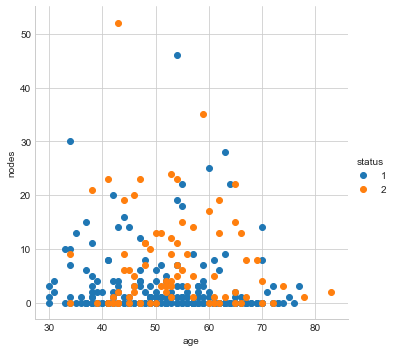

In [33]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue = "status", size = 5)\
 .map(plt.scatter, "age"
      , "nodes")\
 .add_legend()
plt.show()

### Observation:

1. The patients who have 0 nodes are more likely to survived.
2. There are very few patients are having nodes more than 30.

## (6.2) Pair Plot:

Pait plot is the pairwise scatter plot for all features. There are (n(n-1)/2) pair plots for n featues.

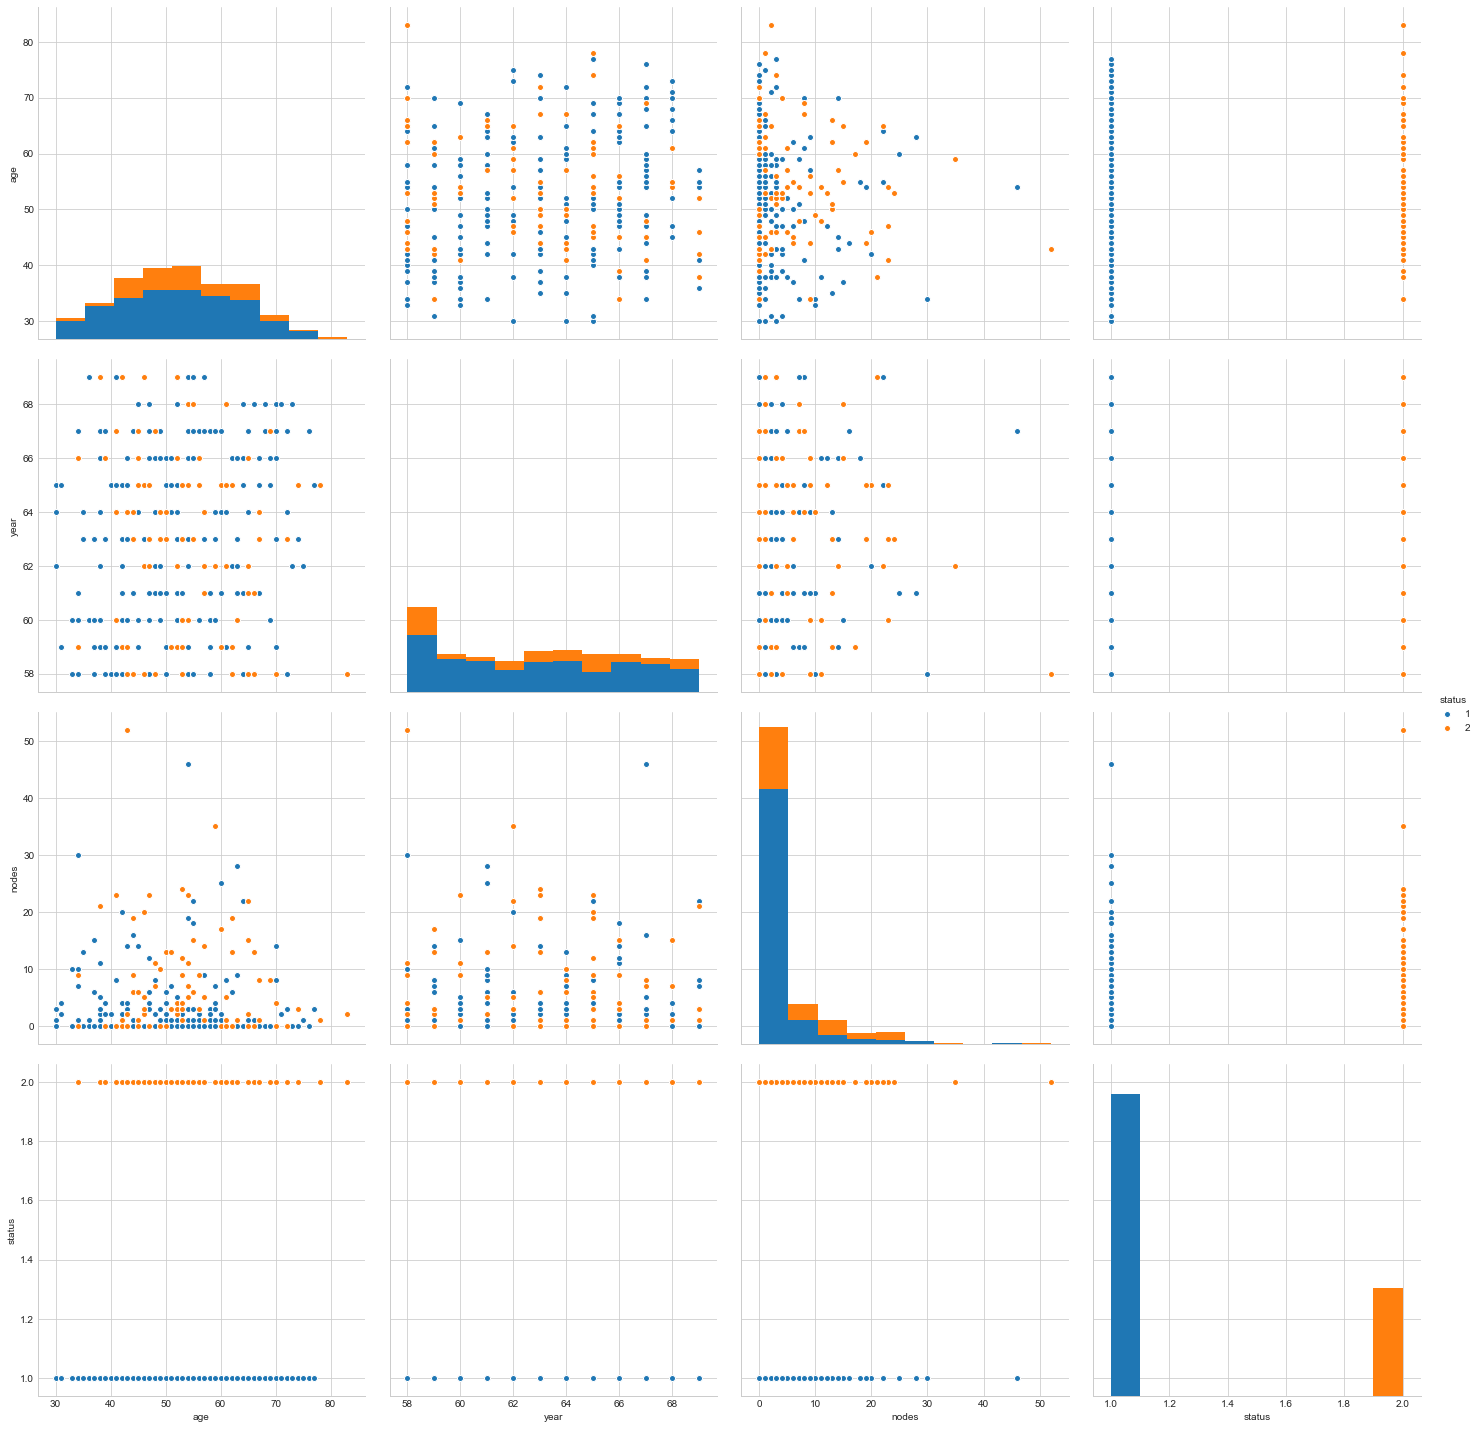

In [35]:
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="status", size = 5)
plt.show()

## (7) Contour plot

Contour plot is the cross-section of 3-D graph.

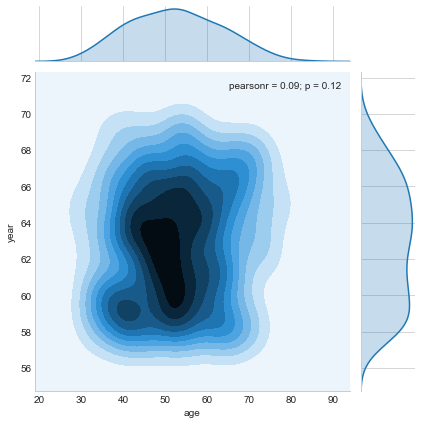

In [42]:
sns.jointplot(x = "age", y = "year", data = haberman, kind = "kde")
plt.show()

### Observation:

From 1959 to 1964, more operations done on the patients in the age group 45 to 55.

## Conclusions:

1. Patient's age and year of operations features alone not useful to decide survival status.
2. Patient's survival chance is inversely proportional to the No. of nodes.
3. It is defficult to classify the survival status of new patients as the data is imbalanced.